In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#### Loading Dataset and Geting Basic Infomation about it

In [291]:
df=pd.read_csv('Titanic Dataset.csv') 
df.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0


#### Description Dataset fields in titanic

1) class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
2) name - Name
3) sex - Sex
4) age - Age
5) sibsp - Number of Siblings/Spouses Aboard
6) parch - Number of Parents/Children Aboard
7) ticket - Ticket Number
8) fare - Passenger Fare
9) cabin - Cabin
10) embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
11) boat - Lifeboat (if survived)
12) body - Body number (if did not survive and body was recovered)
#### TARGET VARIABLE/DEPENDENT VARIABLE in Dataset
1) survival - Survival (0 = No; 1 = Yes)

In [292]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [293]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [294]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


#### Checking for any Nan Values and correcting them

In [295]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1305,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1306,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1307,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


<Axes: >

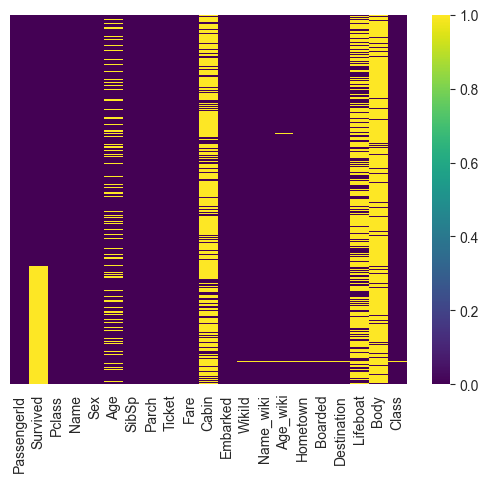

In [296]:
sns.heatmap(df.isnull(),yticklabels=False,cmap=('viridis'))


### Visualisation of Relationship between Iutput and Different Input

#### how many Survived or not

<Axes: xlabel='Survived', ylabel='count'>

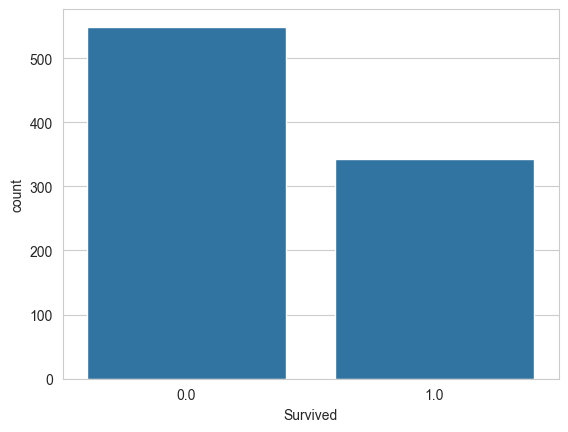

In [297]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

#### relation b.w sex and servival

<Axes: xlabel='Survived', ylabel='count'>

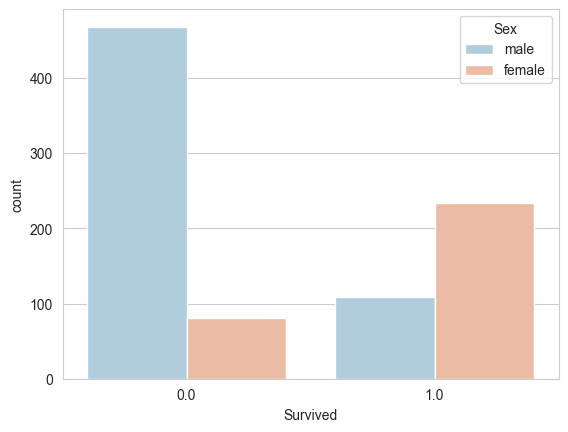

In [298]:
sns.countplot(x='Survived',data=df,hue='Sex',palette='RdBu_r')

#### relation b.w PCLASS and servival

<Axes: xlabel='Survived', ylabel='count'>

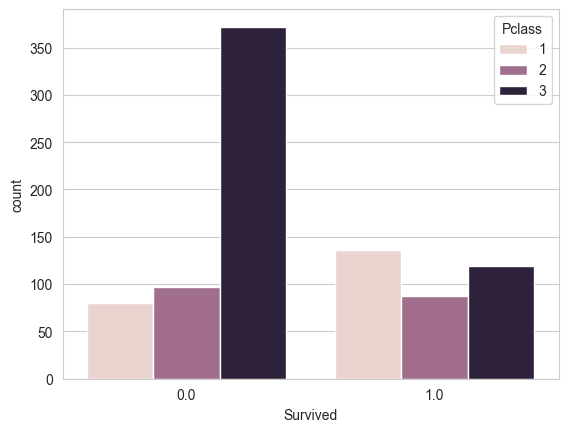

In [299]:
sns.countplot(x='Survived',data=df,hue='Pclass')

#### ploting age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0


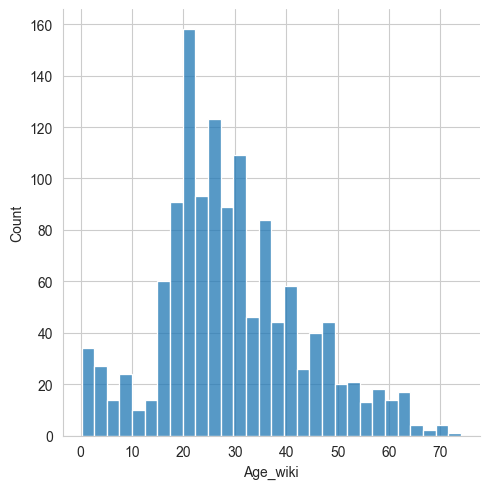

In [300]:
new_df=df.copy()
sns.displot(new_df['Age_wiki'],kde=False,bins=30)
new_df.head(2)

#### relation b.w Age and servival

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Survived', ylabel='Age_wiki'>

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


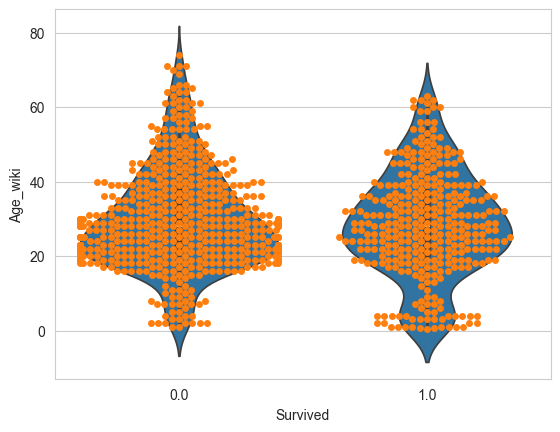

In [301]:
sns.violinplot(x='Survived',y='Age_wiki',data=new_df)
sns.swarmplot(x='Survived',y='Age_wiki',data=new_df)


<Axes: xlabel='Survived', ylabel='Age_wiki'>

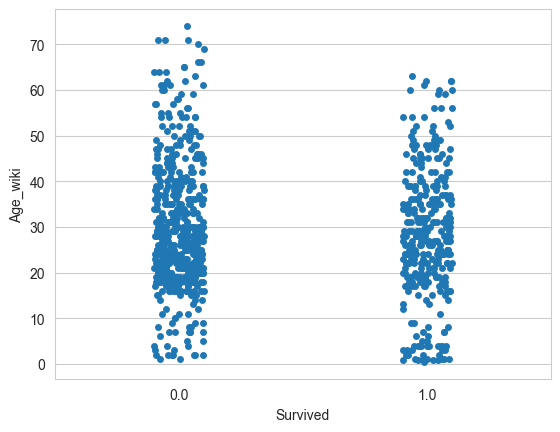

In [302]:
sns.stripplot(x='Survived',y='Age_wiki',data=new_df,jitter=True)

#### relation b.w Sibsb and servival

<Axes: xlabel='SibSp', ylabel='count'>

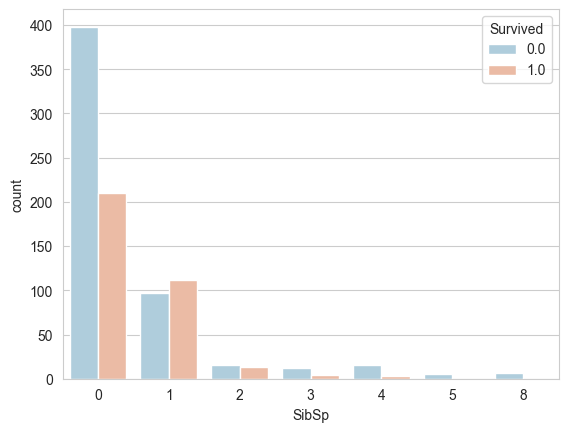

In [303]:
sns.countplot(x='SibSp',data=new_df,hue='Survived',palette='RdBu_r')

#### how much each paid

<Axes: >

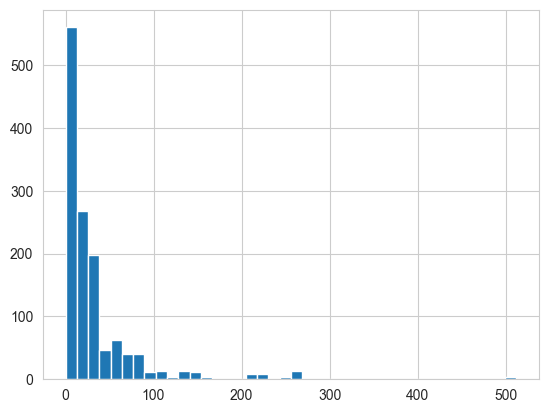

In [304]:
new_df['Fare'].hist(bins=40)

#### relation b.w Fair Paid and servival

<Axes: xlabel='Survived', ylabel='Fare'>

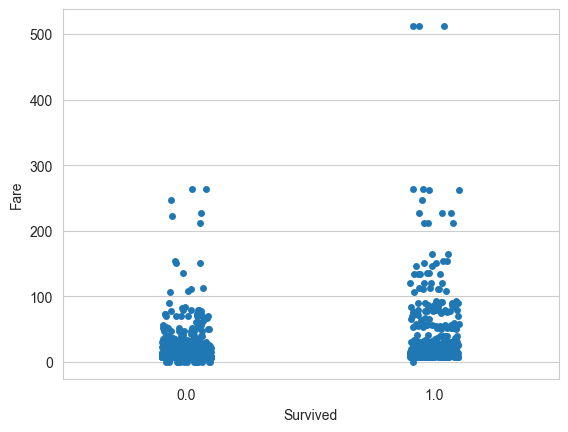

In [305]:
sns.stripplot(x='Survived',y='Fare',data=new_df,jitter=True)

## Droping All the columns that are not required 

In [306]:
new_df=df.copy()
drop_col=['Age','Name','Hometown','Hometown','Destination','Name_wiki','WikiId','PassengerId','Boarded','Body','Cabin','Ticket','Class']
new_df=new_df.drop(columns=drop_col)
new_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_wiki,Lifeboat
0,0.0,3,male,1,0,7.2500,S,22.0,NaN
1,1.0,1,female,1,0,71.2833,C,35.0,4
2,1.0,3,female,0,0,7.9250,S,26.0,14?
3,1.0,1,female,1,0,53.1000,S,35.0,D
4,0.0,3,male,0,0,8.0500,S,35.0,NaN


### Droping all Nan Values rows in Survived col

In [307]:
new_df.dropna(subset=['Survived'], inplace=True)
new_df['Survived']=new_df['Survived'].astype(int)
df['Survived'].isnull().sum()

np.int64(418)

### correcting the AGE col (replacing Nan)

In [308]:
new_df['Age_wiki'] = new_df['Age_wiki'].fillna(new_df['Age_wiki'].mean())
new_df['Age_wiki']=new_df['Age_wiki'].astype(int)
new_df['Age_wiki'].isnull().sum()

np.int64(0)

### Ploting count of Nan values in Column 

<Axes: >

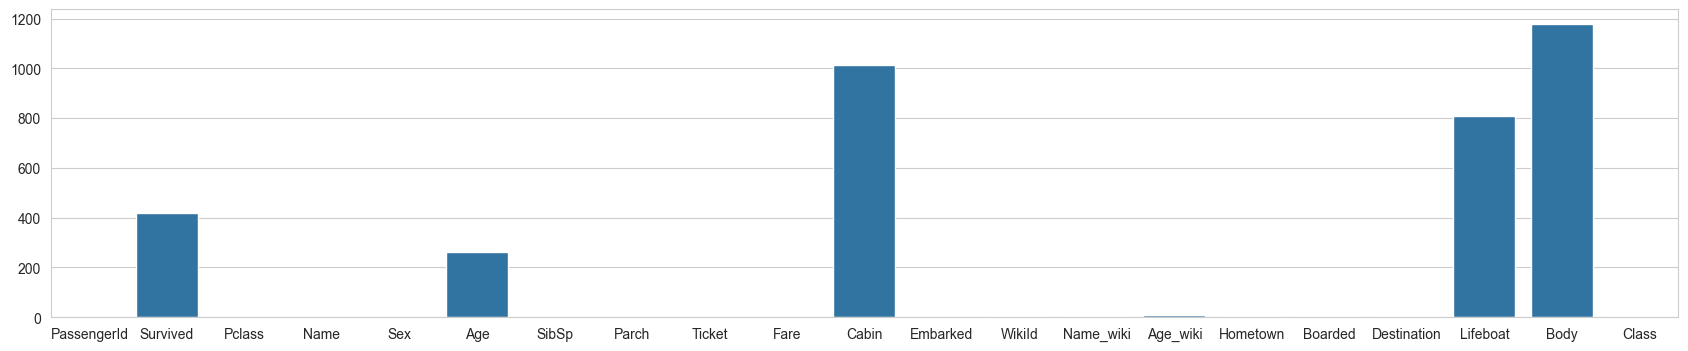

In [309]:
new_df['Survived'].isnull().sum()
plt.figure(figsize=(21,4))
sns.barplot(df.isnull().sum())

### Assuming that if the data of lifeboat is given then we say that he/she have been given life boat (1)
#### else not(0)

In [310]:

new_df['Lifeboat']=new_df['Lifeboat'].fillna(0).map(lambda x:1 if x != 0 else 0)
new_df['Lifeboat']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Lifeboat, Length: 891, dtype: int64

### getting new df details

In [311]:
print(new_df['Lifeboat'].describe())
print(new_df['Lifeboat'].info())

count    891.000000
mean       0.387205
std        0.487385
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Lifeboat, dtype: float64
<class 'pandas.core.series.Series'>
Index: 891 entries, 0 to 890
Series name: Lifeboat
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB
None


<Axes: >

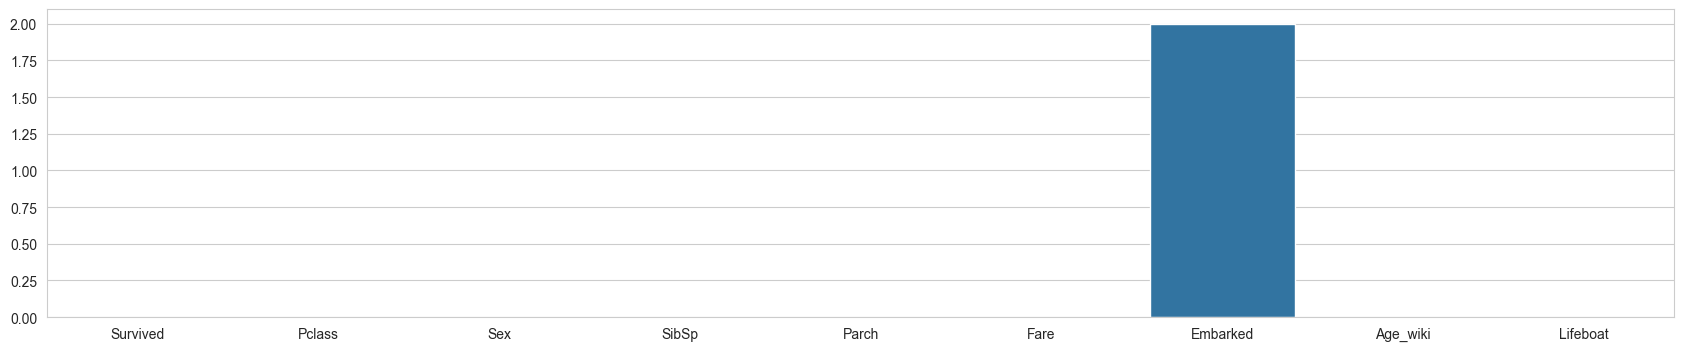

In [312]:
plt.figure(figsize=(21,4))
sns.barplot(new_df.isnull().sum())

<Axes: xlabel='Pclass', ylabel='Age_wiki'>

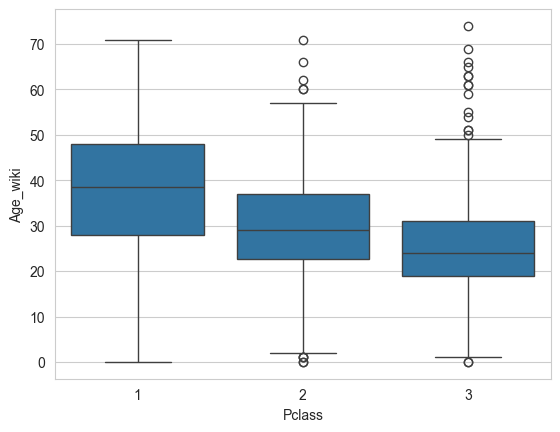

In [313]:
sns.boxplot(y='Age_wiki',x='Pclass',data=new_df)

 ### replacing male with 1 and female with 0 and  Embarked to 0 and 1

In [314]:
new_df['Sex'] = new_df['Sex'].map({'male': 1, 'female': 0})

In [315]:
embark=pd.get_dummies(new_df['Embarked'],drop_first=True).astype(int)
embark.head()
new_df=pd.concat([new_df,embark],axis=1)
new_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_wiki,Lifeboat,Q,S
0,0,3,1,1,0,7.2500,S,22,0,0,1
1,1,1,0,1,0,71.2833,C,35,1,0,0
2,1,3,0,0,0,7.9250,S,26,1,0,1
3,1,1,0,1,0,53.1000,S,35,1,0,1
4,0,3,1,0,0,8.0500,S,35,0,0,1


<Axes: >

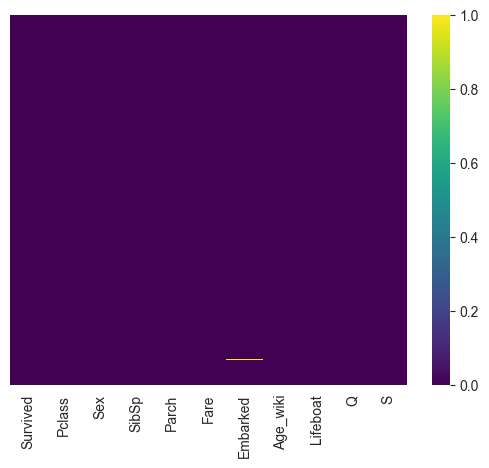

In [316]:
sns.heatmap(new_df.isnull(),yticklabels=False,cmap=('viridis'))

In [317]:
new_df=new_df.drop(columns=['Embarked'],axis=1)
new_df.head()
std_df=new_df.copy()
new_df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age_wiki',
       'Lifeboat', 'Q', 'S'],
      dtype='object')

### Splitting Data

In [318]:
X=new_df.drop('Survived',axis=1)
y=new_df['Survived']
print(y.head())
print(X.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass  Sex  SibSp  Parch     Fare  Age_wiki  Lifeboat  Q  S
0       3    1      1      0   7.2500        22         0  0  1
1       1    0      1      0  71.2833        35         1  0  0
2       3    0      0      0   7.9250        26         1  0  1
3       1    0      1      0  53.1000        35         1  0  1
4       3    1      0      0   8.0500        35         0  0  1


In [319]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.25, random_state=42)

In [320]:
print("shape of x_train : ",X_train.shape)
print("shape of Y_train : ",y_train.shape)
print("shape of X_test : ",X_test.shape)
print("shape of y_test : ",y_test.shape)

shape of x_train :  (668, 9)
shape of Y_train :  (668,)
shape of X_test :  (223, 9)
shape of y_test :  (223,)


### Using Logistic Regression 

In [321]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting

In [322]:
predictions=model.predict(X_test)
model.score(X_train,y_train)

0.9955089820359282

### Checking where our Predictions differ from our Prediction


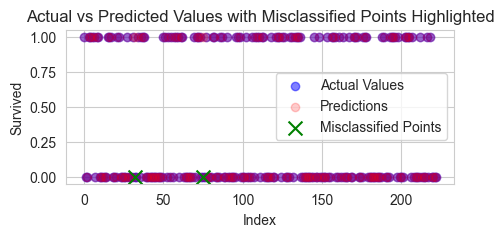

Index: 32, Actual: 0, Predicted: 1
Index: 75, Actual: 0, Predicted: 1


In [323]:
y_test_array = np.array(y_test)
predictions_array = np.array(predictions)

misclassified_indices = np.where(y_test_array != predictions_array)[0]
plt.figure(figsize=(5, 2))
plt.scatter(range(len(y_test_array)), y_test_array, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(range(len(y_test_array)), predictions_array, color='red', label='Predictions', alpha=0.2)

plt.scatter(misclassified_indices, y_test_array[misclassified_indices], color='green', label='Misclassified Points', marker='x', s=100)

plt.xlabel('Index')
plt.ylabel('Survived')
plt.legend()
plt.title('Actual vs Predicted Values with Misclassified Points Highlighted')
plt.show()

# Print misclassified indices and corresponding actual and predicted values
for i in misclassified_indices:
    print(f"Index: {i}, Actual: {y_test_array[i]}, Predicted: {predictions_array[i]}")

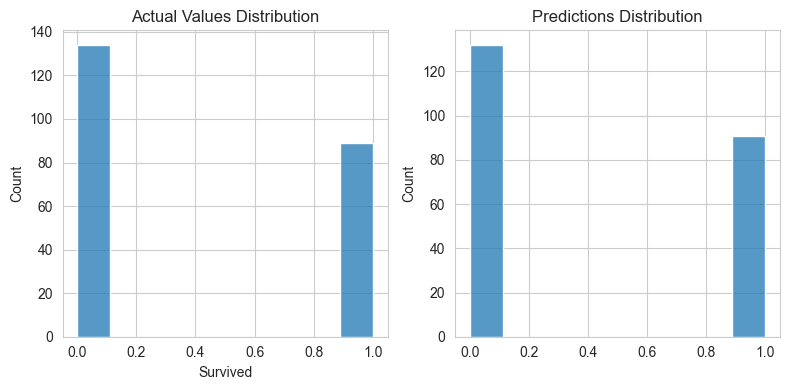

In [324]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plot y_test distribution
sns.histplot(y_test, ax=ax[0], kde=False)
ax[0].set_title('Actual Values Distribution')

# Plot predictions distribution
sns.histplot(predictions, ax=ax[1], kde=False)
ax[1].set_title('Predictions Distribution')

# Show the plots
plt.tight_layout()
plt.show()

###  Calculating error percentage and evaluating result 

In [325]:
metrics.mean_absolute_error(y_test,predictions)

np.float64(0.008968609865470852)

In [326]:
metrics.mean_squared_error(y_test,predictions)

np.float64(0.008968609865470852)

In [327]:
metrics.mean_squared_error(y_test,predictions)

np.float64(0.008968609865470852)

In [328]:
model.score(X_test,y_test)*100

99.10313901345292

In [329]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       134
           1       0.98      1.00      0.99        89

    accuracy                           0.99       223
   macro avg       0.99      0.99      0.99       223
weighted avg       0.99      0.99      0.99       223



In [330]:
metrics.confusion_matrix(y_test,predictions)


array([[132,   2],
       [  0,  89]])

## Using Standardization and Optimizer to Enhance Speed


In [331]:
X = std_df.drop('Survived', axis=1)
y = std_df['Survived']
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Create the logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)
predictions=log_reg.predict(x_test_scaled)
# Evaluate the model
score = log_reg.score(X_test_scaled, y_test)
print(f'Accuracy: {score}')

Accuracy: 0.9888268156424581


### Evaluating the model

In [333]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.97      1.00      0.99        74

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



In [334]:
metrics.confusion_matrix(y_test,predictions)

array([[103,   2],
       [  0,  74]])